# **Data Loading**
we will be loading Breast cancer Data from DataLab using the pandas 'read_csv` function.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn import metrics

url =  "/content/wdbc.data"
columns = ['ID', 'Diagnosis',
           'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness',
           'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
           'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness',
           'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
df = pd.read_csv(url, header=None, names=columns)
df.head()

,ID,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Data Exploration
To understand more about the dataset we will use `.info()`.
The dataset consists of 6 columns and 569 rows.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   mean_radius              569 non-null    float64
 3   mean_texture             569 non-null    float64
 4   mean_perimeter           569 non-null    float64
 5   mean_area                569 non-null    float64
 6   mean_smoothness          569 non-null    float64
 7   mean_compactness         569 non-null    float64
 8   mean_concavity           569 non-null    float64
 9   mean_concave_points      569 non-null    float64
 10  mean_symmetry            569 non-null    float64
 11  mean_fractal_dimension   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
print(df.isnull().sum())

ID                         0
Diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64


<Axes: >

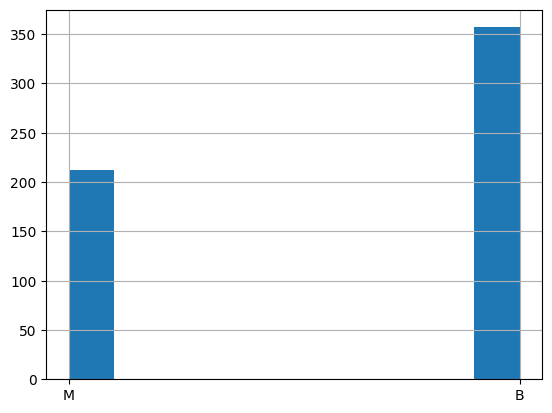

In [4]:
df['Diagnosis'].hist()

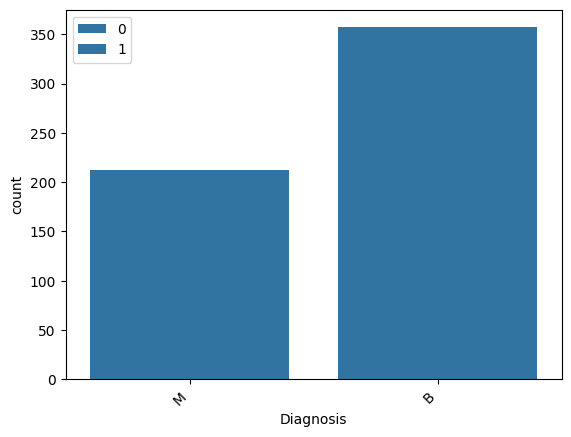

In [20]:
sns.countplot(data=df,x='Diagnosis',hue=0)
sns.countplot(data=df,x='Diagnosis',hue=1)
plt.xticks(rotation=45, ha='right');


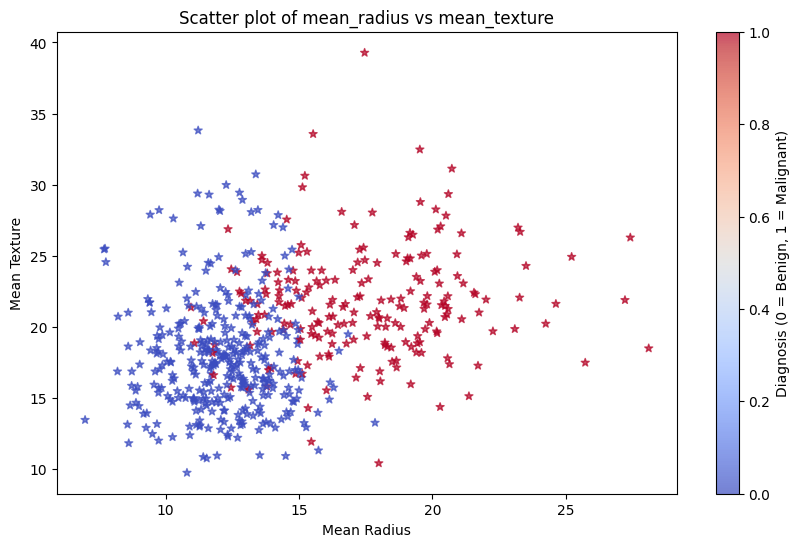

In [21]:
feature_x = 'mean_radius'
feature_y = 'mean_texture'
target_column = 'Diagnosis'

df = df.dropna(subset=['mean_radius', 'mean_texture', 'Diagnosis'])
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['mean_radius'], df['mean_texture'], c=df['Diagnosis'], cmap='coolwarm', alpha=0.7,marker='*')
plt.title('Scatter plot of mean_radius vs mean_texture')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.colorbar(label='Diagnosis (0 = Benign, 1 = Malignant)')
plt.show()

# **Train Test Split**
Before we start the training process, we need to split the dataset into training and testing for model evaluation.

In [9]:
from sklearn.preprocessing import StandardScaler

# تطبيق StandardScaler
scaler = StandardScaler()
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

In [22]:
# Feature columns and target
X = df.drop(columns=['ID', 'Diagnosis'])
y = df['Diagnosis']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (569, 30)
y shape: (569,)


In [23]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test =train_test_split(X,y,test_size=0.22,random_state=42)

In [25]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
# Model training
model.fit(x_train, y_train)

# Predict Output
y_pred = model.predict(x_test)




In [26]:
print("Actual Value:", y_test)
print("Predicted Value:", y_pred)

Actual Value: 204    0
70     1
131    1
431    0
540    0
      ..
137    0
155    0
517    1
88     0
449    1
Name: Diagnosis, Length: 126, dtype: int64
Predicted Value: [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1]


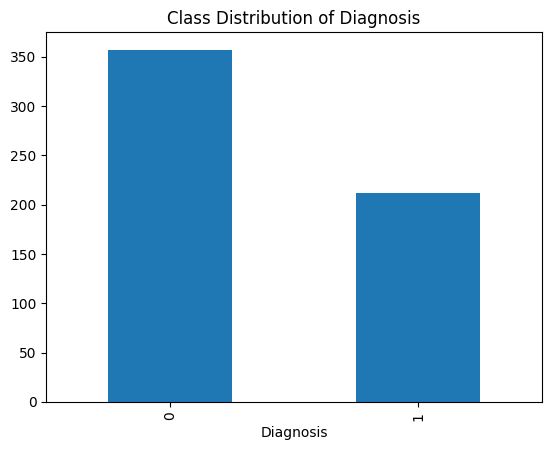

In [27]:
df['Diagnosis'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Diagnosis')
plt.show()


In [28]:
print(df['Diagnosis'].value_counts())

Diagnosis
0    357
1    212
Name: count, dtype: int64


In [29]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

clf_report = metrics.classification_report(y_test, y_pred)
print(clf_report)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n {cm}")

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        79
           1       0.96      0.94      0.95        47

    accuracy                           0.96       126
   macro avg       0.96      0.96      0.96       126
weighted avg       0.96      0.96      0.96       126

Accuracy: 0.9603174603174603
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1 Score: 0.946236559139785
Confusion Matrix:
 [[77  2]
 [ 3 44]]


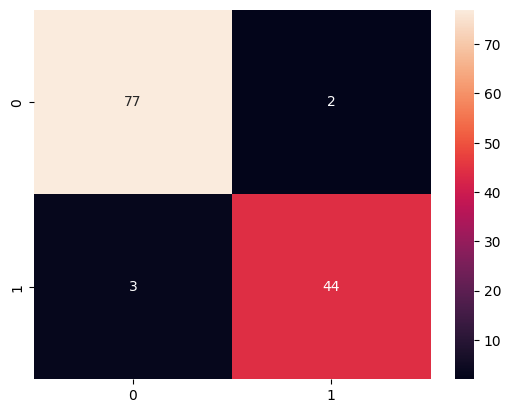

In [30]:
sns.heatmap(cm, annot = True)
plt.show()